In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.8 MB 656.4 kB/s eta 0:01:00
   ---------------------------------------- 0.1/38.8 MB 737.3 kB/s eta 0:00:53
   ---------------------------------------- 0.2/38.8 MB 952.6 kB/s eta 0:00:41
   ---------------------------------------- 0.2/38.8 MB 986.4 kB/s eta 0:00:40
   ---------------------------------------- 0.3/38.8 MB 1.0 MB/s eta 0:00:37
   ---------------------------------------- 0.3/38.8 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.4/38.8 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.4/38.8 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.4/38.8 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.5/38.8 MB 973.2 kB/s eta 0:00:40
    --------------------------------------- 0.6/38.8 MB 992.2 kB/s eta 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # Image library in python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [16]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228813984/228813984 [==============================] - 48s 0us/step


In [18]:
data_dir

'.\\datasets\\flower_photos'

In [23]:
# Now converting this data directory into a pathlib
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [25]:
# glob gives all  the images that has extension jpg
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [27]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [33]:
# getting only roses
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

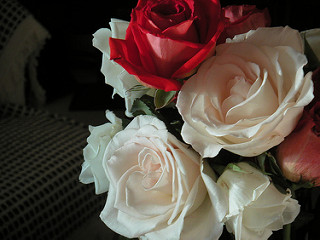

In [35]:
PIL.Image.open(str(roses[1])) # gives image of rose at 1st position

In [39]:
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

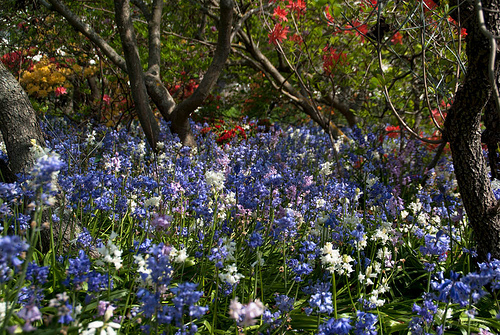

In [41]:
PIL.Image.open(str(tulips[1])) # gives image of tulips at 1st position

In [47]:
# Creating class names dictionary along with image path associated with it
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_images_dict['daisy'] # contains all the file parts of daisy

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [49]:
# Creating a label dictionary and assigning random class number to each of these flowers
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [55]:
# Usng cv2 module to read this image file into opencv object . It reads the path of the image and converts it into simple numpy array
str(flowers_images_dict['roses'][0])
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [59]:
# converting the image size to a standard size for all images
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [66]:
# Creating X, Y VARIABLES
X,y=[],[]
for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [68]:
y[:5]

[0, 0, 0, 0, 0]

In [71]:
# converting X and y into simple numpy array
X=np.array(X)
y=np.array(y)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [77]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [81]:
# Building the network without the augmentation layer
num_classes=5

model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), # flattening the 3D matrix into 1D
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)
    
                  

Epoch 1/10
86/86 [==============================] - 102s 1s/step - loss: 1.3032 - accuracy: 0.4506
Epoch 2/10
86/86 [==============================] - 95s 1s/step - loss: 0.9559 - accuracy: 0.6275
Epoch 3/10
86/86 [==============================] - 92s 1s/step - loss: 0.7842 - accuracy: 0.7028
Epoch 4/10
86/86 [==============================] - 93s 1s/step - loss: 0.5775 - accuracy: 0.7867
Epoch 5/10
86/86 [==============================] - 92s 1s/step - loss: 0.3676 - accuracy: 0.8695
Epoch 6/10
86/86 [==============================] - 92s 1s/step - loss: 0.2065 - accuracy: 0.9328
Epoch 7/10
86/86 [==============================] - 93s 1s/step - loss: 0.1295 - accuracy: 0.9637
Epoch 8/10
86/86 [==============================] - 93s 1s/step - loss: 0.0905 - accuracy: 0.9742
Epoch 9/10
86/86 [==============================] - 92s 1s/step - loss: 0.0737 - accuracy: 0.9807
Epoch 10/10
86/86 [==============================] - 92s 1s/step - loss: 0.0490 - accuracy: 0.9855


In [83]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 352ms/step - loss: 1.9614 - accuracy: 0.6580


[1.961427092552185, 0.657952070236206]

In [ ]:
# WE CAN SEE THAT THE MODEL PERFORMS VERY WELL ON THE TEST DATA WITH AN ACCURACY OF 98 WHEREAS IN THE TEST DATA IT PERFORMS POORLY WITH AN ACCURACY OF 65 HENCE INDICATING THE ISSUE OF IVERFITTING WHICH IS CORRECTED USING DATA AUGMENTATION

In [85]:
predictions=model.predict(X_test_scaled)
predictions

29/29 [==============================] - 12s 345ms/step


array([[  1.7041872,  13.341815 ,   1.6642348, -18.764765 ,  -2.6980948],
       [  9.628341 ,  -2.0366488,  -8.2320385,  -7.807369 ,   4.237741 ],
       [ -2.3273635,   0.4602835,   8.2454195, -10.685211 ,  -2.7444386],
       ...,
       [ -3.058684 ,   0.8736309,  -5.8001657,   6.585543 ,   3.9040246],
       [ -4.341648 ,   3.904827 ,  -1.9139415,   3.0708005,  -3.734982 ],
       [  0.7773488,  -9.197841 ,   1.7039204,   7.403959 ,   7.086886 ]],
      dtype=float32)

In [87]:
# Converting these values into a probability of 0 to 1 using softmax
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8.8274446e-06, 9.9998260e-01, 8.4817202e-06, 1.1383673e-14,
       1.0813052e-07], dtype=float32)>

In [89]:
np.argmax(score) # predicted value

1

In [91]:
y_test[0] # actual value

1

In [97]:
# BUILDING DATA AUGMENTATION LAYER
img_height = 180  # or any desired height
img_width = 180   # or any desired width

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

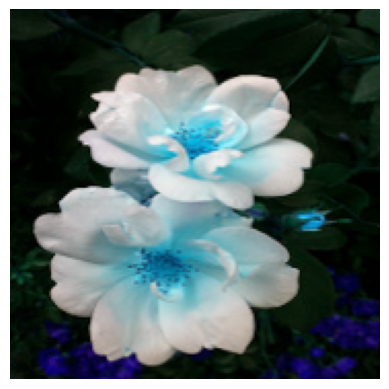

In [99]:
# ORIGINAL IMAGE
plt.axis('off')
plt.imshow(X[0])

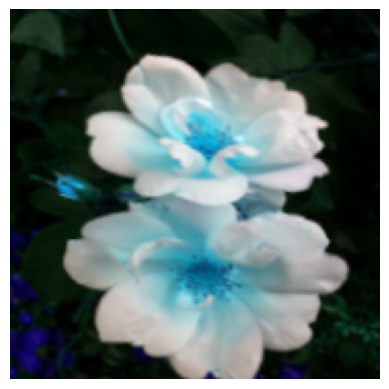

In [101]:
# NEWLY GENERATED TRAINING SAMPLE USING DATA AUGMENTATION
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [103]:
# Building the network with the augmentation layer
num_classes=5

model=Sequential([
    data_augmentation, 
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(), # flattening the 3D matrix into 1D
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)
    

Epoch 1/10
86/86 [==============================] - 158s 800ms/step - loss: 1.2380 - accuracy: 0.4840
Epoch 2/10
86/86 [==============================] - 79s 921ms/step - loss: 0.9820 - accuracy: 0.6134
Epoch 3/10
86/86 [==============================] - 66s 771ms/step - loss: 0.8825 - accuracy: 0.6570
Epoch 4/10
86/86 [==============================] - 67s 785ms/step - loss: 0.8337 - accuracy: 0.6762
Epoch 5/10
86/86 [==============================] - 61s 712ms/step - loss: 0.7819 - accuracy: 0.7039
Epoch 6/10
86/86 [==============================] - 60s 697ms/step - loss: 0.7292 - accuracy: 0.7140
Epoch 7/10
86/86 [==============================] - 59s 690ms/step - loss: 0.6881 - accuracy: 0.7406
Epoch 8/10
86/86 [==============================] - 55s 638ms/step - loss: 0.6812 - accuracy: 0.7442
Epoch 9/10
86/86 [==============================] - 54s 631ms/step - loss: 0.6116 - accuracy: 0.7620
Epoch 10/10
86/86 [==============================] - 55s 643ms/step - loss: 0.6042 - accur

In [105]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 163ms/step - loss: 0.7616 - accuracy: 0.7179


[0.7616297006607056, 0.7178649306297302]

In [ ]:
# ACCURACY OF TEST DATA BEFORE ADDING AUGMENTATION LAYER 0.65 AND AFTER ADDING AUGMENTATION LAYER 0.71